
# Carbon Footprint Data Aggregator

This notebook is used to aggregate the Carbon Footprint data and compare the data provided by wellsfargo with the derived Carbon Footprint from the data

In [1]:
import pandas as pd
import numpy as np

In [2]:
individuals_df = pd.read_excel(r'Data.xlsx', sheet_name='Individuals')

In [3]:
individuals_df.head()

,Indnum,Group,Activity,Units,Consumption,Quality_of_Life_Importance__1_10,solar_powered__water_heater,gas_water_heater,electric_water_heater___peak_hou,electric_water_heater___off_peak,gas,natural_gas,hybrid,electric___peak_hours,electric___off_peak_hours,jetfuel
0,1,1,Household heating => 70F,hours,2.0,88.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
1,1,1,Household heating < 70F,hours,10.0,85.0,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
2,1,1,Use of heat pump,hours,NaN,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,1,Use of air conditioner,hours,20.0,45.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,2,shower - short,count,5.0,98.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
individuals_df.shape

(27054, 16)

In [5]:
aggregated_activities_df=pd.DataFrame()
for i in range(27):
    for index, row in individuals_df.iterrows():
        if(index%27)==i:
            aggregated_activities_df=aggregated_activities_df.append(row)

In [6]:
aggregated_activities_df = aggregated_activities_df.reset_index(drop=True)
aggregated_activities_df.to_csv(path_or_buf='aggregated_activities_data.csv')
aggregated_activities_df = aggregated_activities_df.fillna(0)

In [7]:
aggregated_activities_df.head()

,Activity,Consumption,Group,Indnum,Quality_of_Life_Importance__1_10,Units,electric___off_peak_hours,electric___peak_hours,electric_water_heater___off_peak,electric_water_heater___peak_hou,gas,gas_water_heater,hybrid,jetfuel,natural_gas,solar_powered__water_heater
0,Household heating => 70F,2.0,1.0,1.0,88.0,hours,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,Household heating => 70F,7.0,1.0,2.0,77.0,count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,Household heating => 70F,3.0,1.0,3.0,64.0,hours,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,Household heating => 70F,10.0,1.0,4.0,93.0,count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,Household heating => 70F,8.0,1.0,5.0,80.0,hours,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [8]:
summary_df=pd.DataFrame()
for j in range(27):
    new_row=[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]
    for index, row in aggregated_activities_df.loc[ (j*1002) : ((j+1)*1002-1) ].iterrows():
        new_row += (row[1] * row[6:])
    summary_df = summary_df.append([new_row])
    

In [9]:
summary_df.head()

,electric___off_peak_hours,electric___peak_hours,electric_water_heater___off_peak,electric_water_heater___peak_hou,gas,gas_water_heater,hybrid,jetfuel,natural_gas,solar_powered__water_heater
0,0.0,123.0,758.0,731.0,140.0,831.0,55.0,0.0,5639.0,272.0
1002,0.0,141.0,817.0,601.0,108.0,717.0,158.0,0.0,5524.0,306.0
2004,0.0,-7.0,-13.0,-2.0,0.0,-16.0,-1.0,0.0,0.0,-15.0
3006,0.0,505.0,2882.0,2278.0,411.0,1228.0,550.0,0.0,0.0,1243.0
4008,0.0,86.0,244.0,694.0,90.0,688.0,133.0,0.0,0.0,265.0


In [10]:
carbon_df = pd.read_excel(r'Data.xlsx', sheet_name='Carbon Footprint', header=1, index_col=1)

In [11]:
carbon_df.head()

,Activity,Per,solar powered water heater,gas water heater,electric water heater - peak hours,electric water heater - off peak hours,gas,natural gas,Jet Fuel,waste management,hybrid,electric - peak hours,electric - off peak hours,Unnamed: 13,Notes
Household heating => 70F,1,hour,NaN,NaN,NaN,NaN,NaN,0.000436,NaN,NaN,NaN,0.000650,0.000542,NaN,NaN
Household heating < 70F,2,hour,NaN,NaN,NaN,NaN,NaN,0.000872,NaN,NaN,NaN,0.000923,0.000901,NaN,NaN
Use of heat pump,3,hour,NaN,NaN,NaN,NaN,NaN,0.001074,NaN,NaN,NaN,0.001229,0.001188,NaN,NaN
Use of air conditioner,4,hour,NaN,NaN,NaN,NaN,NaN,0.000598,NaN,NaN,NaN,0.007980,0.000721,NaN,NaN
shower - short,5,activity,0.000012,0.000102,0.000232,0.000199,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
carbon_df = carbon_df.drop(axis=1, columns=['Unnamed: 13', 'Notes'])

In [13]:
import seaborn as sns
from matplotlib import pyplot as plt

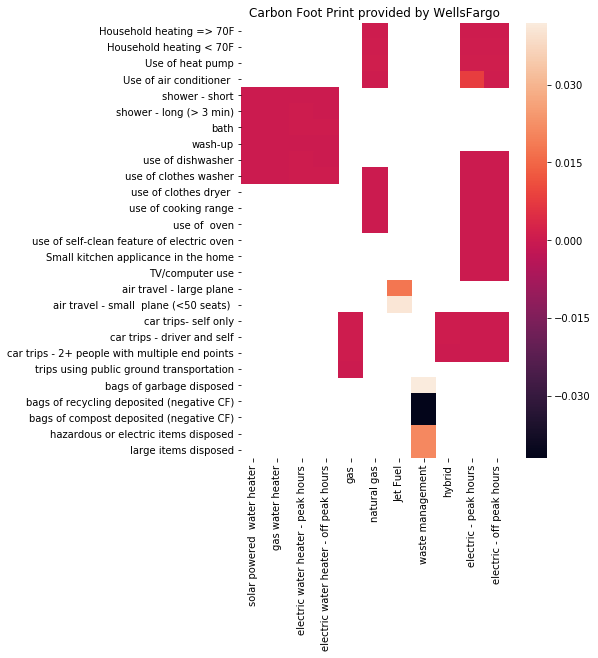

In [15]:
plt.rcParams['figure.figsize'] = (6, 8)
sns.heatmap(carbon_df.iloc[:,2:])
plt.title('Carbon Foot Print provided by WellsFargo')
plt.savefig('Carbon Foot Print heatmap provided by WellsFargo.jpeg')

In [16]:
dic={}
for i in range(27):
    dic[i]=carbon_df.index[i]

In [17]:
summary_df = summary_df.reset_index(drop=True); 
summary_df.index = summary_df.index.map(dic)

In [19]:
summary_df = summary_df[['solar_powered__water_heater', 'gas_water_heater', 'electric_water_heater___peak_hou',
                        'electric_water_heater___off_peak', 'gas', 'natural_gas', 'jetfuel', 'hybrid',
                        'electric___peak_hours', 'electric___off_peak_hours']]

In [20]:
summary_df.head()

,solar_powered__water_heater,gas_water_heater,electric_water_heater___peak_hou,electric_water_heater___off_peak,gas,natural_gas,jetfuel,hybrid,electric___peak_hours,electric___off_peak_hours
Household heating => 70F,272.0,831.0,731.0,758.0,140.0,5639.0,0.0,55.0,123.0,0.0
Household heating < 70F,306.0,717.0,601.0,817.0,108.0,5524.0,0.0,158.0,141.0,0.0
Use of heat pump,-15.0,-16.0,-2.0,-13.0,0.0,0.0,0.0,-1.0,-7.0,0.0
Use of air conditioner,1243.0,1228.0,2278.0,2882.0,411.0,0.0,0.0,550.0,505.0,0.0
shower - short,265.0,688.0,694.0,244.0,90.0,0.0,0.0,133.0,86.0,0.0


In [21]:
summary_df = summary_df.replace(0, np.nan)

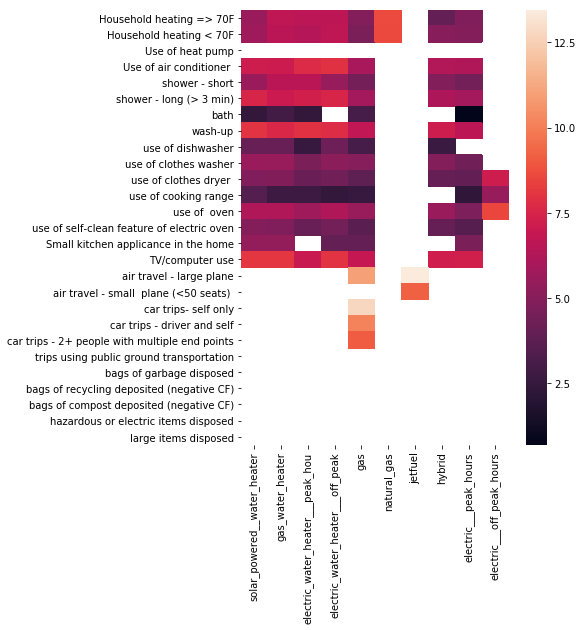

In [22]:
sns.heatmap(summary_df.apply(np.log))
plt.savefig('summary of Carbon Foot Print heatmap provided from data.jpeg')